In [4]:
import zipfile
import os

# 1. Define file paths
zip_path = r"C:\Users\15716\DS CAP\Original Image.zip"
extract_to = r"C:\Users\15716\DS CAP\Original_Image"  # note: no spaces in folder name is safer

# 2. Create folder if not exists
os.makedirs(extract_to, exist_ok=True)

# 3. Unzip safely (skips permission-locked files)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for member in zip_ref.namelist():
        try:
            zip_ref.extract(member, extract_to)
        except PermissionError:
            print(f"Skipped {member} (Permission denied)")

# 4. Set root directory
os.chdir(extract_to)
print("Root directory set to:", os.getcwd())

# 5. See what’s inside (should list your image folders)
print("Top-level files and folders:", os.listdir())

Root directory set to: C:\Users\15716\DS CAP\Original_Image
Top-level files and folders: ['Fruits Original']


In [5]:
# unzipping 
import zipfile
import os

zip_path = r"C:\Users\15716\DS CAP\Original Image.zip"
extract_to = r"C:\Users\15716\DS CAP\Original_Image"  

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for member in zip_ref.namelist():
        try:
            zip_ref.extract(member, extract_to)
        except PermissionError:
            print(f"Skipped {member} (Permission denied)")

os.chdir(extract_to)
print("Root directory set to:", os.getcwd())
print("Top-level files and folders:", os.listdir())

Root directory set to: C:\Users\15716\DS CAP\Original_Image
Top-level files and folders: ['Fruits Original']


In [1]:
# Use %pip so installs go into THIS running kernel
%pip install --upgrade pip
%pip install --upgrade ipykernel jupyter_client traitlets pyzmq
# Many stack combos still prefer tornado 6.x; pin if you’re seeing kernel crashes
%pip install "tornado<7"
# Handy for async-related crashes in Notebook/Lab
%pip install nest_asyncio


Note: you may need to restart the kernel to use updated packages.
  Using cached ipykernel-6.31.0-py3-none-any.whl.metadata (4.5 kB)
  Using cached jupyter_client-8.6.3-py3-none-any.whl.metadata (8.3 kB)
  Using cached jupyter_core-5.8.1-py3-none-any.whl.metadata (1.6 kB)
Using cached ipykernel-6.31.0-py3-none-any.whl (117 kB)
Using cached jupyter_client-8.6.3-py3-none-any.whl (106 kB)
Using cached jupyter_core-5.8.1-py3-none-any.whl (28 kB)
  Attempting uninstall: jupyter-core
    Found existing installation: jupyter_core 4.11.1
    Uninstalling jupyter_core-4.11.1:
      Successfully uninstalled jupyter_core-4.11.1
  Attempting uninstall: jupyter_client
    Found existing installation: jupyter_client 7.3.4
    Uninstalling jupyter_client-7.3.4:
      Successfully uninstalled jupyter_client-7.3.4
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.15.2
    Uninstalling ipykernel-6.15.2:
      Successfully uninstalled ipykernel-6.15.2

Note: you may need to r

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
from collections import Counter

root_dir = r"C:\Users\15716\DS CAP\Original_Image"
classes = []
for fruit in os.listdir(root_dir):
    fruit_path = os.path.join(root_dir, fruit)
    if os.path.isdir(fruit_path):
        for condition in os.listdir(fruit_path):
            cond_path = os.path.join(fruit_path, condition)
            if os.path.isdir(cond_path):
                classes.append(f"{fruit}/{condition}")

print("Classes found:", classes)

# Count number of images per class
counts = {}
for cls in classes:
    cls_path = os.path.join(root_dir, *cls.split('/'))
    counts[cls] = sum([1 for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path,f))])

print("Image counts per class:")
print(counts)

Classes found: ['Fruits Original/Apple', 'Fruits Original/Banana', 'Fruits Original/Grape', 'Fruits Original/Mango', 'Fruits Original/Orange']
Image counts per class:
{'Fruits Original/Apple': 1, 'Fruits Original/Banana': 1, 'Fruits Original/Grape': 1, 'Fruits Original/Mango': 1, 'Fruits Original/Orange': 1}


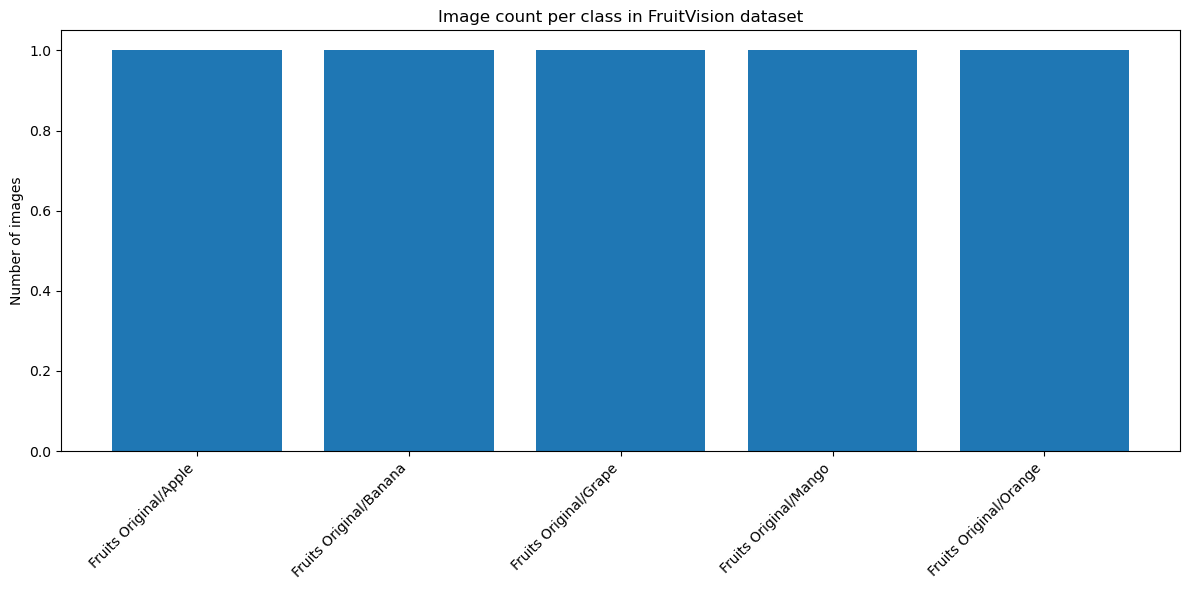

In [3]:
import matplotlib.pyplot as plt

# use counts from above
classes_list = list(counts.keys())
counts_list = list(counts.values())

plt.figure(figsize=(12,6))
plt.bar(classes_list, counts_list)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of images")
plt.title("Image count per class in FruitVision dataset")
plt.tight_layout()
plt.show()

In [5]:
import os

root_dir = r"C:\Users\15716\DS CAP\Original_Image"

# list first-level subfolders
print("Top-level folders:", os.listdir(root_dir))

# explore one level deeper (for example the first fruit folder)
for folder in os.listdir(root_dir):
    path = os.path.join(root_dir, folder)
    if os.path.isdir(path):
        print(f"\nContents inside '{folder}':", os.listdir(path))
        break


Top-level folders: ['Fruits Original']

Contents inside 'Fruits Original': ['Apple', 'Banana', 'desktop.ini', 'Grape', 'Mango', 'Orange']


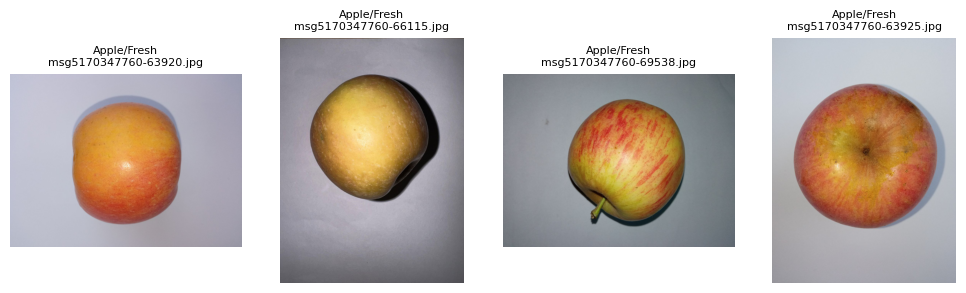

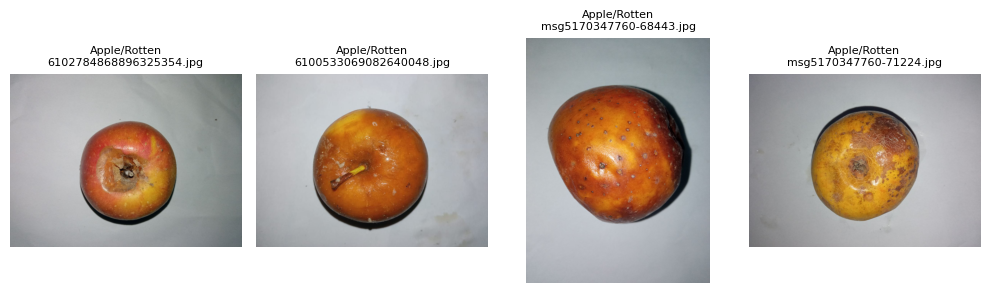

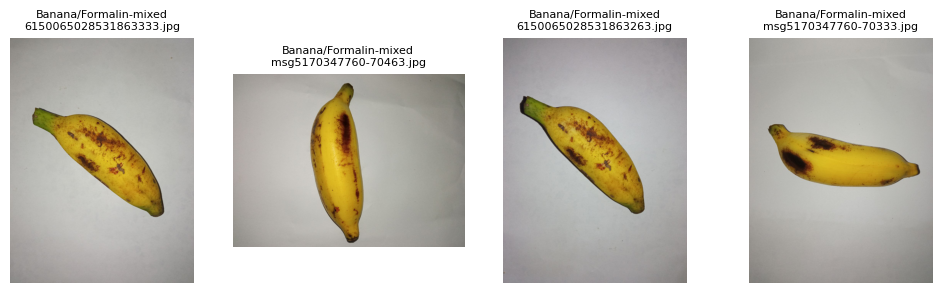

In [6]:
root_dir = r"C:\Users\15716\DS CAP\Original_Image\Fruits Original"

show_samples("Apple/Fresh")
show_samples("Apple/Rotten")
show_samples("Banana/Formalin-mixed")

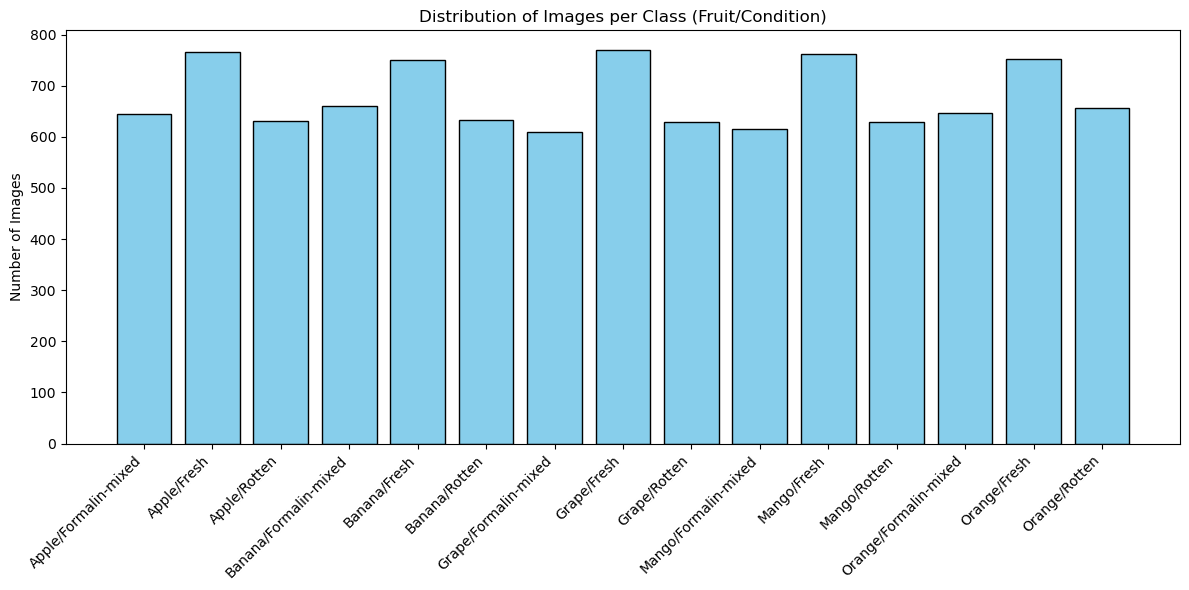

In [7]:
import os
import matplotlib.pyplot as plt

# count images per class
counts = {}
for fruit in os.listdir(root_dir):
    fruit_path = os.path.join(root_dir, fruit)
    if os.path.isdir(fruit_path):
        for condition in os.listdir(fruit_path):
            cond_path = os.path.join(fruit_path, condition)
            if os.path.isdir(cond_path):
                n = len([f for f in os.listdir(cond_path) if os.path.isfile(os.path.join(cond_path, f))])
                counts[f"{fruit}/{condition}"] = n

# make a bar plot
plt.figure(figsize=(12,6))
plt.bar(counts.keys(), counts.values(), color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Class (Fruit/Condition)")
plt.tight_layout()
plt.show()


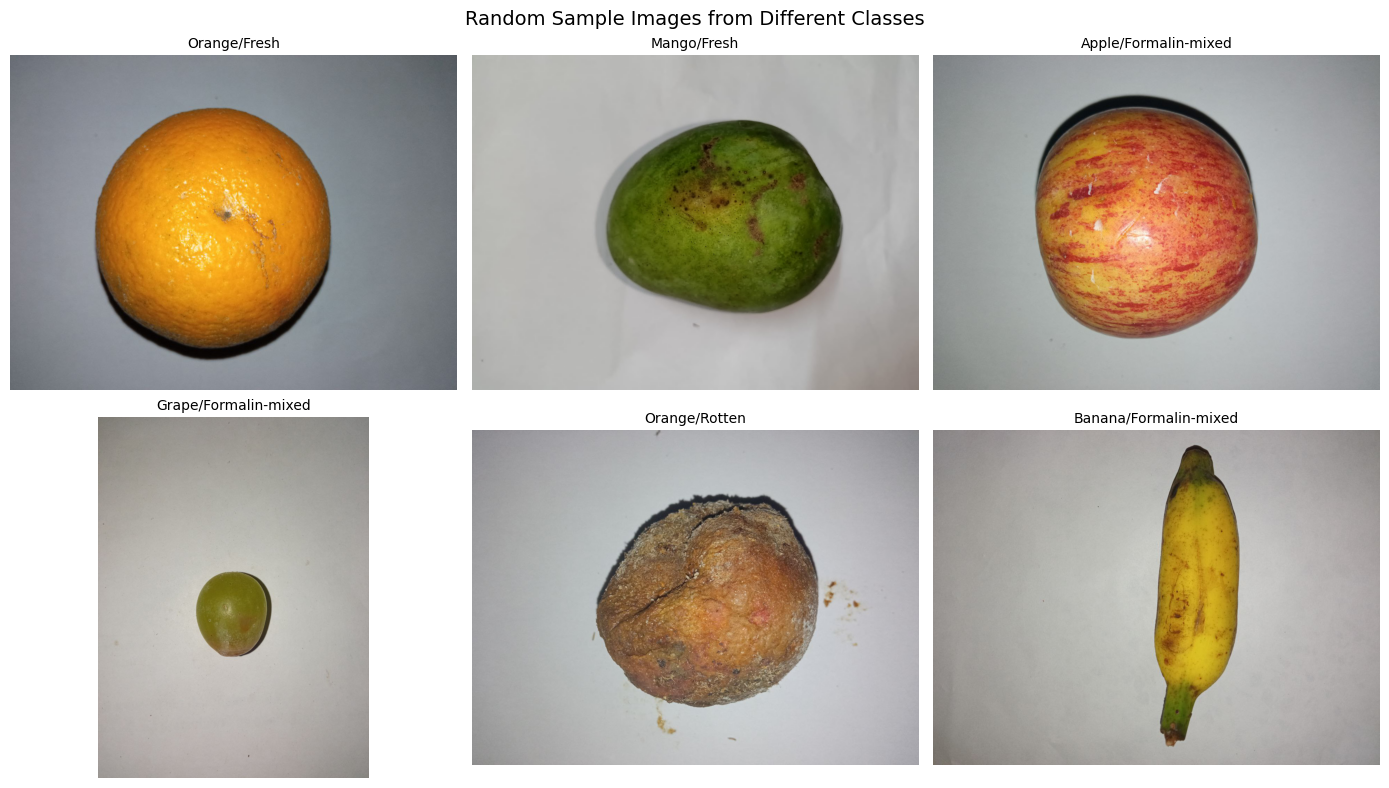

In [8]:
import random
import matplotlib.image as mpimg

classes = list(counts.keys())
sample_classes = random.sample(classes, min(6, len(classes)))  # pick up to 6 classes

plt.figure(figsize=(14,8))
for i, cls in enumerate(sample_classes):
    cls_path = os.path.join(root_dir, *cls.split('/'))
    img_files = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))]
    if len(img_files) == 0:
        continue
    img_file = random.choice(img_files)
    img = mpimg.imread(os.path.join(cls_path, img_file))
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(cls, fontsize=10)
plt.suptitle("Random Sample Images from Different Classes", fontsize=14)
plt.tight_layout()
plt.show()


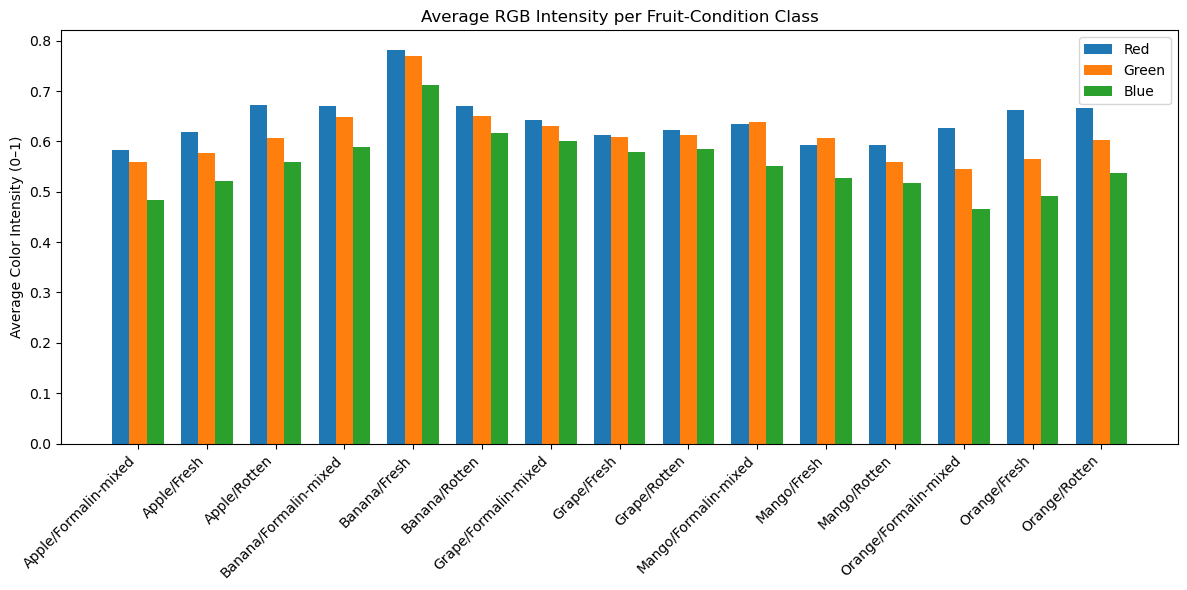

📊 Figure 2. Average RGB intensity across fruit-condition classes (fresh vs rotten vs formalin-mixed).


In [6]:
import os, random, numpy as np
import matplotlib.pyplot as plt
from PIL import Image

root_dir = r"C:\Users\15716\DS CAP\Original_Image\Fruits Original"
sample_size = 5      # try 3–10 per class
verbose = True       # set False to silence prints

valid_ext = {'.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff'}

def get_image_files(folder):
    files = []
    for f in os.listdir(folder):
        ext = os.path.splitext(f)[1].lower()
        if ext in valid_ext:
            files.append(os.path.join(folder, f))
    return files

avg_colors = {}
for fruit in os.listdir(root_dir):
    fruit_path = os.path.join(root_dir, fruit)
    if not os.path.isdir(fruit_path): 
        continue
    for condition in os.listdir(fruit_path):
        cond_path = os.path.join(fruit_path, condition)
        if not os.path.isdir(cond_path): 
            continue

        img_files = get_image_files(cond_path)
        if not img_files:
            if verbose: print(f"[SKIP] No images in: {fruit}/{condition}")
            continue

        # sample AFTER filtering
        k = min(sample_size, len(img_files))
        chosen = random.sample(img_files, k)

        color_means = []
        for fpath in chosen:
            try:
                with Image.open(fpath) as im:
                    im = im.convert("RGB")           # ensure 3 channels
                    arr = np.asarray(im, dtype=np.float32) / 255.0
                    color_means.append(arr.mean(axis=(0,1)))
            except Exception as e:
                if verbose: print(f"[WARN] Could not read {fpath}: {e}")
                continue

        if color_means:
            avg_colors[f"{fruit}/{condition}"] = np.mean(color_means, axis=0)
        else:
            if verbose: print(f"[SKIP] No valid images after read: {fruit}/{condition}")

# ---- Plot (safe for 1+ classes) ----
labels = list(avg_colors.keys())
values = list(avg_colors.values())
if not values:
    raise ValueError("Still no classes computed. Double-check root_dir and that folders contain images.")

rgb_values = np.array(values)
if rgb_values.ndim == 1:
    rgb_values = rgb_values.reshape(1, -1)

# keep labels & values aligned
labels, rgb_values = zip(*sorted(zip(labels, rgb_values), key=lambda t: t[0]))
rgb_values = np.vstack(rgb_values)

x = np.arange(len(labels))
plt.figure(figsize=(12,6))
plt.bar(x - 0.25, rgb_values[:,0], width=0.25, label='Red')
plt.bar(x,             rgb_values[:,1], width=0.25, label='Green')
plt.bar(x + 0.25, rgb_values[:,2], width=0.25, label='Blue')
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel("Average Color Intensity (0–1)")
plt.title("Average RGB Intensity per Fruit-Condition Class")
plt.legend()
plt.tight_layout()
plt.show()

print("📊 Figure 2. Average RGB intensity across fruit-condition classes (fresh vs rotten vs formalin-mixed).")


# Res-Net 50 CNN

In [7]:
data_root = r"C:\Users\15716\DS CAP\Original_Image\Fruits Original"
print(os.listdir(data_root))  # should be ['Apple', 'Banana', 'Grape', 'Mango', 'Orange']

['Apple', 'Banana', 'desktop.ini', 'Grape', 'Mango', 'Orange']


In [8]:
from torchvision import datasets, transforms

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

full_dataset = datasets.ImageFolder(root=data_root, transform=train_transform)

print("Classes found:", full_dataset.classes)
print("Total images:", len(full_dataset))

Classes found: ['Apple', 'Banana', 'Grape', 'Mango', 'Orange']
Total images: 10154


In [9]:
from collections import Counter

label_counts = Counter(full_dataset.targets)
class_names = full_dataset.classes
for idx, cls_name in enumerate(class_names):
    print(cls_name, "→", label_counts[idx])


Apple → 2038
Banana → 2041
Grape → 2010
Mango → 2009
Orange → 2056


In [10]:
# Filter out any samples from 'Formalin-mixed'
filtered_samples = []
for path, target in full_dataset.samples:
    # normalize slashes for Windows
    if "Formalin-mixed" in path.replace("\\", "/"):
        continue
    filtered_samples.append((path, target))

print("Before filtering:", len(full_dataset.samples))
print("After filtering Formalin-mixed:", len(filtered_samples))

# Replace dataset samples with filtered list
full_dataset.samples = filtered_samples
full_dataset.imgs = filtered_samples
full_dataset.targets = [label for _, label in filtered_samples]

# Recompute counts after filtering
from collections import Counter
label_counts = Counter(full_dataset.targets)
for idx, cls_name in enumerate(full_dataset.classes):
    print(cls_name, "→", label_counts[idx])

Before filtering: 10154
After filtering Formalin-mixed: 6978
Apple → 1395
Banana → 1381
Grape → 1400
Mango → 1393
Orange → 1409


### multi-class fruit x condition (apple_fresh,apple_rotten, ...) 

In [11]:
import os
from torchvision import datasets, transforms

# 1) Point this to the folder that contains the fruit folders directly
# From your output, it should be something like:
data_root = r"C:\Users\15716\DS CAP\Original_Image\Fruits Original"

print("Top-level under data_root:", os.listdir(data_root))

# 2) Transforms for ResNet-50
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # ImageNet stats
        std=[0.229, 0.224, 0.225]
    ),
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
])

# 3) Load with ImageFolder: this will see fruit/condition as classes
full_dataset = datasets.ImageFolder(root=data_root, transform=train_transform)

print("Original classes from ImageFolder:", full_dataset.classes)
print("Original total samples:", len(full_dataset))

# Expect classes like:
# ['Apple/Fresh', 'Apple/Formalin-mixed', 'Apple/Rotten', 'Banana/Fresh', ...]


Top-level under data_root: ['Apple', 'Banana', 'desktop.ini', 'Grape', 'Mango', 'Orange']
Original classes from ImageFolder: ['Apple', 'Banana', 'Grape', 'Mango', 'Orange']
Original total samples: 10154


In [12]:
# 4) Filter out any samples from 'Formalin-mixed'
filtered_samples = []
for path, target in full_dataset.samples:
    norm_path = path.replace("\\", "/")  # Windows -> forward slashes
    if "Formalin-mixed" in norm_path:
        continue
    filtered_samples.append((path, target))

print("Samples before filtering:", len(full_dataset.samples))
print("Samples after removing Formalin-mixed:", len(filtered_samples))

# 5) Re-map labels to contiguous indices (0..num_classes-1)
old_labels = sorted({t for _, t in filtered_samples})
old_to_new = {old: new for new, old in enumerate(old_labels)}

new_samples = [(path, old_to_new[target]) for path, target in filtered_samples]

# 6) Build new class names (fruit × condition, no Formalin)
new_classes = [full_dataset.classes[old] for old in old_labels]

# 7) Overwrite dataset internals to reflect filtered, remapped data
full_dataset.samples = new_samples
full_dataset.imgs = new_samples
full_dataset.targets = [label for _, label in new_samples]
full_dataset.classes = new_classes
full_dataset.class_to_idx = {cls_name: i for i, cls_name in enumerate(new_classes)}

num_classes = len(new_classes)

print("Filtered classes (fruit × condition, no Formalin):", full_dataset.classes)
print("Number of classes:", num_classes)
print("Number of samples after filtering:", len(full_dataset))


Samples before filtering: 10154
Samples after removing Formalin-mixed: 6978
Filtered classes (fruit × condition, no Formalin): ['Apple', 'Banana', 'Grape', 'Mango', 'Orange']
Number of classes: 5
Number of samples after filtering: 6978


In [13]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Train/val split
val_ratio = 0.2
n_total = len(full_dataset)
n_val = int(n_total * val_ratio)
n_train = n_total - n_val

train_dataset, val_dataset = random_split(
    full_dataset,
    [n_train, n_val],
    generator=torch.Generator().manual_seed(42)
)

# Set transforms for each split
train_dataset.dataset.transform = train_transform
val_dataset.dataset.transform = val_transform

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

# Build ResNet-50 with transfer learning
resnet = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)

# Freeze backbone
for param in resnet.parameters():
    param.requires_grad = False

# Replace last layer for multi-class fruit×condition
in_features = resnet.fc.in_features
resnet.fc = nn.Linear(in_features, num_classes)

resnet = resnet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet.fc.parameters(), lr=1e-3)


Using device: cuda
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\15716/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


100.0%


In [14]:
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = outputs.max(1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    return running_loss / total, correct / total


def eval_model(model, loader, criterion, device):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, preds = outputs.max(1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()

    return running_loss / total, correct / total


num_epochs = 5  # increase if you have GPU/time

for epoch in range(num_epochs):
    train_loss, train_acc = train_one_epoch(resnet, train_loader, optimizer, criterion, device)
    val_loss, val_acc = eval_model(resnet, val_loader, criterion, device)

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")


Epoch 1/5 | Train Loss: 0.2735, Acc: 0.9407 | Val Loss: 0.0640, Acc: 0.9885
Epoch 2/5 | Train Loss: 0.0801, Acc: 0.9812 | Val Loss: 0.0434, Acc: 0.9907
Epoch 3/5 | Train Loss: 0.0502, Acc: 0.9893 | Val Loss: 0.0284, Acc: 0.9935
Epoch 4/5 | Train Loss: 0.0449, Acc: 0.9889 | Val Loss: 0.0240, Acc: 0.9971
Epoch 5/5 | Train Loss: 0.0356, Acc: 0.9907 | Val Loss: 0.0167, Acc: 0.9957


### Classification report  (precision, recall, F1 per class)

In [15]:
from sklearn.metrics import classification_report

all_labels = []
all_preds = []

resnet.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet(images)
        _, preds = outputs.max(1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

print(classification_report(all_labels, all_preds, target_names=full_dataset.classes))


              precision    recall  f1-score   support

       Apple       0.99      0.99      0.99       261
      Banana       1.00      1.00      1.00       288
       Grape       1.00      1.00      1.00       277
       Mango       1.00      0.99      0.99       289
      Orange       0.99      1.00      1.00       280

    accuracy                           1.00      1395
   macro avg       1.00      1.00      1.00      1395
weighted avg       1.00      1.00      1.00      1395



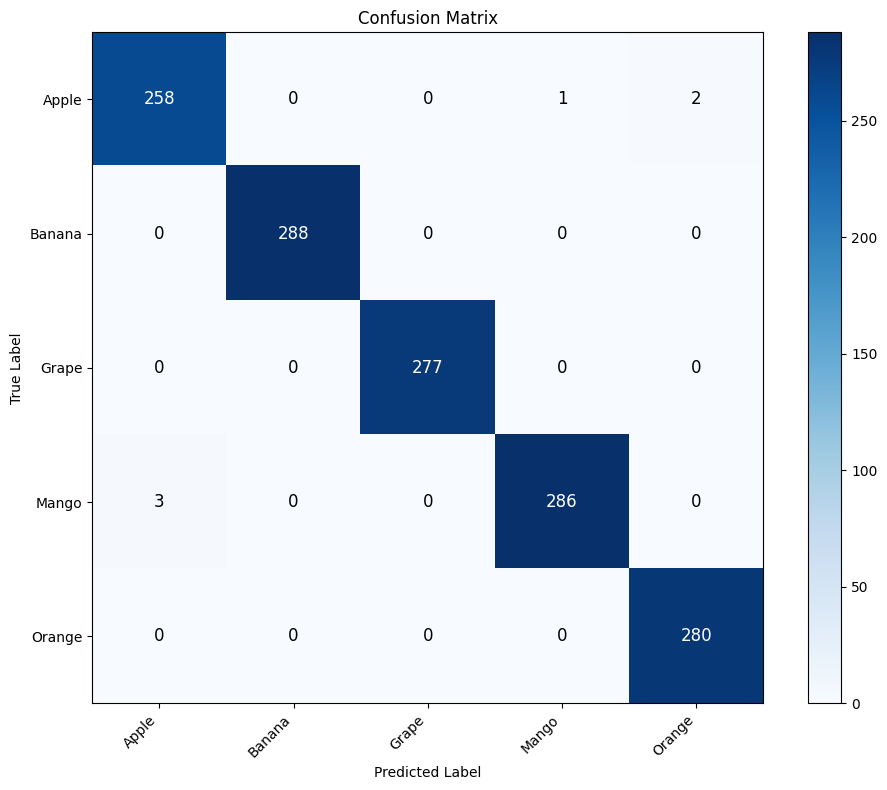

In [20]:
# confusion matrix 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
cm = np.array(cm)

# 2. Create matplotlib heatmap (no seaborn)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# 3. Tick labels (your fruit × condition class names)
tick_marks = np.arange(len(full_dataset.classes))
plt.xticks(tick_marks, full_dataset.classes, rotation=45, ha='right')
plt.yticks(tick_marks, full_dataset.classes)

# 4. Annotate each cell with the integer count
thresh = cm.max() / 2  # determines text color
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()
